In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

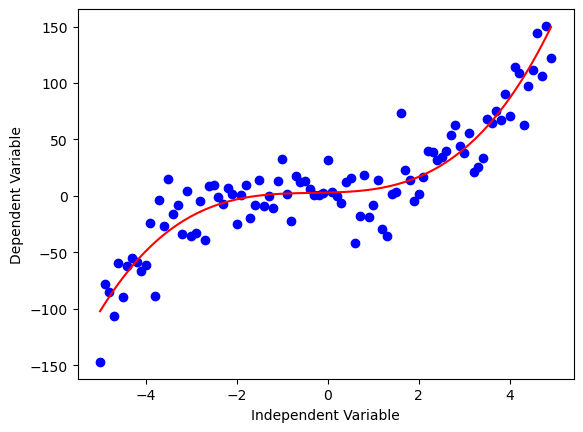

In [4]:
#Non-linear regression models the non-linear relationships between dependent and independent variables
#below is code to plot a cubic function graph
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [5]:
#fitting a non-linear model to chinas gdp from 1960-2014
#getting data
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv
df = pd.read_csv("china_gdp.csv")

2022-12-19 12:47:22 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


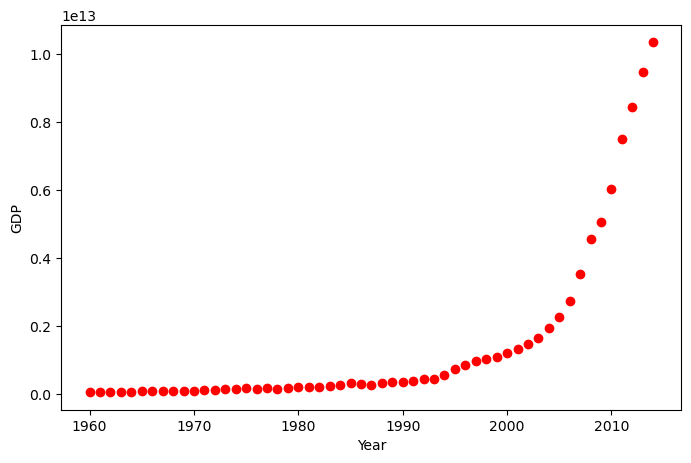

In [6]:
#plotting the dataset
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [8]:
#can see data set resembles an exponential or logistic function, definetly a non-linear function

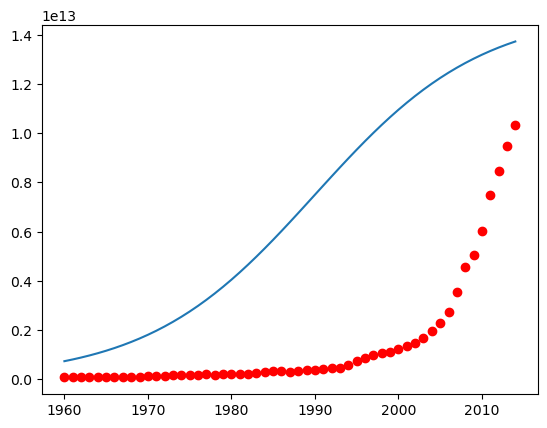

In [9]:
#plotting a sample sigmoid line to see how it fits the data
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [10]:
#Building the model
#Normalize the data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [11]:
#Using the curve fit function uses non linear least squares to fit sigmoid function to data
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


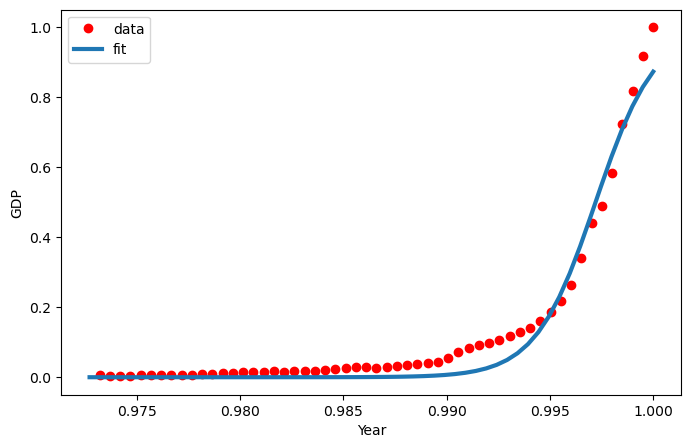

In [12]:
#Plot regression model
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [23]:
# split into train/test
msk = np.random.rand(len(df)) < 0.8
x_training = xdata[msk]
x_test = xdata[~msk]
y_training = ydata[msk]
y_test = ydata[~msk]

In [25]:
# building model using train
popt, pcov = curve_fit(sigmoid, x_training, y_training)

In [27]:
# predict using test set
y_hat = sigmoid(x_test, *popt)

In [29]:
# evaluation
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test,y_hat) )

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: 0.88
